In [1]:
import pickle
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from CLaSP import CLaSP

In [3]:
with open('data/ChangePoint_test__gestures__10_r_high.pkl', 'rb') as handle:
    gestures = pickle.load(handle)
print(gestures.shape)
with open('data/ChangePoint_test__change_points__10_r_high.pkl', 'rb') as handle:
    change_points = pickle.load(handle)
print(change_points)

(10, 120, 67, 2)
[[ 18  42  59  82]
 [ 17  41  71 100]
 [ 15  36  46  69]
 [ 17  35  53  74]
 [ 16  42  54  83]
 [ 18  38  57  80]
 [ 16  40  57  88]
 [ 16  40  83 106]
 [ 13  32  55  71]
 [ 16  46  55  80]]


In [4]:
gestures.shape

(10, 120, 67, 2)

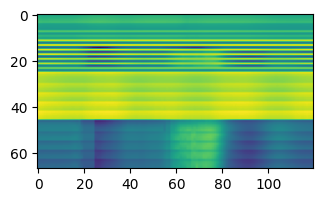

In [5]:
plt.figure(figsize=(4,2))
plt.imshow(gestures[4,::,::,0].T)
plt.show()

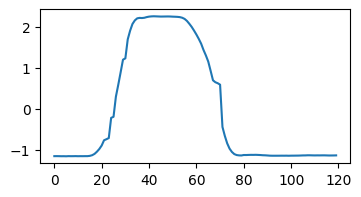

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
vec_pca = pca.fit_transform(gestures[9,::,::,1])

plt.figure(figsize=(4,2))
plt.plot(vec_pca)
plt.show()

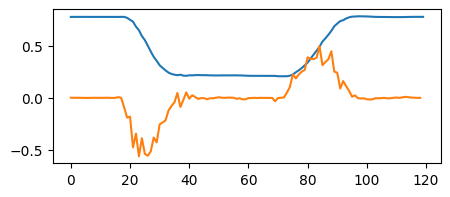

In [7]:
vec = gestures[1,::,16,1]
plt.figure(figsize=(5,2))
plt.plot(vec)
plt.plot(np.diff(vec,1)*10)
plt.show()

In [8]:
22*5

110

In [9]:
cls = CLaSP(window=12, solver='knn')
cls.fit(vec, n_segments=5)

print(cls.stack)

100%|█████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 182.17it/s]

deque([{'start': 0, 'stop': 15, 'clasp_scores': None, 'clasp_max_idx': -1, 'clasp_max_val': 0}, {'start': 15, 'stop': 28, 'clasp_scores': None, 'clasp_max_idx': -1, 'clasp_max_val': 0}, {'start': 28, 'stop': 85, 'clasp_scores': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.7083333333333334, 0.6916666666666668, 0.7130952380952381, 0.6523809523809524, 0.610989010989011, 0.623992673992674, 0.6175213675213675, 0.5807387057387058, 0.519993894993895, 0.5853174603174603, 0.586940836940837, 0.590007215007215, 0.5909090909090909, 0.6462962962962963, 0.681986531986532, 0.6944444444444443, 0.7074074074074074, 0.7333333333333334, 0.7222222222222222, 0.7337962962962963, 0.6990740740740741, 0.6666666666666666, 0.6577380952380952, 0.6158008658008658, 0.6150793650793651, 0.6428571428571429, 0.6309523809523809, 0.6666666666666666, 0.6833333333333335, 0.7222222222222222, 0.7000000000000001, 0.75, 0.6916666666666668, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'clasp_max_idx': 43, 'clasp_max_val': 0.75}, {'start': 85,

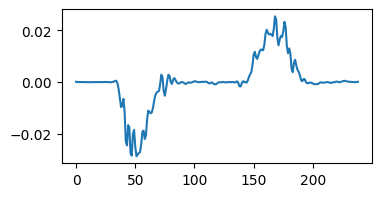

In [10]:
from scipy import interpolate

def interpolate_vec(vec, new_step_size=0.5):
    x = np.arange(0, vec.shape[0])
    y = vec
    f = interpolate.interp1d(x, y, kind='cubic', bounds_error=False, fill_value='extrapolate')
    xnew = np.arange(0, vec.shape[0], new_step_size)
    ynew = f(xnew)
    return xnew, ynew

xnew, ynew = interpolate_vec(vec, new_step_size=0.5)

plt.figure(figsize=(4,2))
# plt.plot(vec)
# plt.plot(xnew, ynew)
# plt.plot(ynew)
plt.plot(np.diff(ynew))

plt.show()

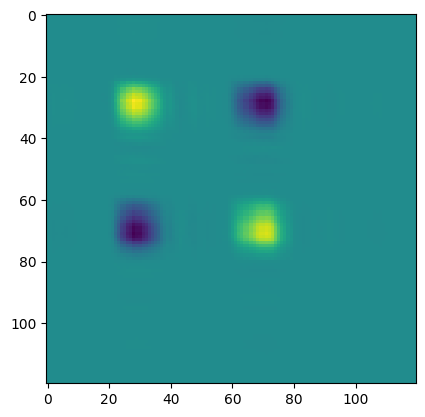

In [11]:
from scipy.spatial import distance_matrix

def create_dist_matrix(vec_ts, window):
    # expand vec by window//2 to keep same dims
    vec_left_expand = np.insert(vec_ts, obj=0, values=vec_ts[window//2:0:-1])
    vec_both_expand = np.insert(vec_left_expand, obj=-1, values=vec_ts[-window//2:])
    # matrix creation
    X_list = []
    j = 0
    while j < vec_both_expand.shape[0]-window:
        X_list.append(vec_both_expand[j:j+window])
        j += 1
    X = np.array(X_list)
    # distance matrix
    X_dist = distance_matrix(X, X)
    return X, X_dist

vec = gestures[0,::,16,1]
X, X_dist = create_dist_matrix(vec, window=4)
X_dist = np.diff(X) @ np.diff(X).T
plt.imshow(X_dist)
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 142.96it/s]


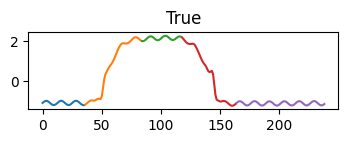

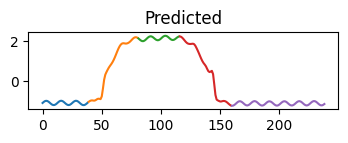

predicted= [ 39  81 116 160]
true=      [ 32  84 108 166]


100%|█████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 141.03it/s]


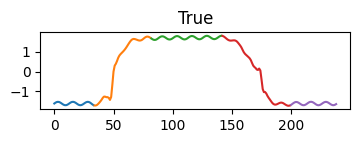

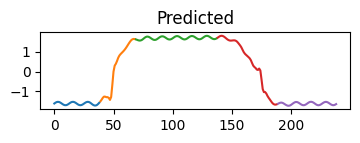

predicted= [ 39  69 138 189]
true=      [ 32  84 108 166]


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 187.40it/s]


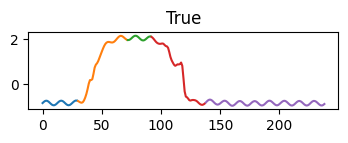

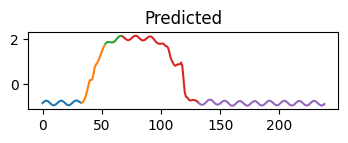

predicted= [ 33  53  68 132]
true=      [ 32  84 108 166]


100%|█████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 147.38it/s]


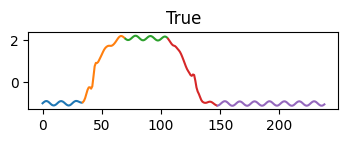

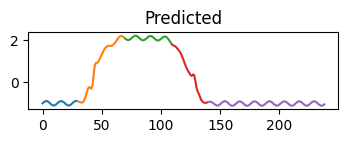

predicted= [ 30  70 109 140]
true=      [ 32  84 108 166]


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 159.56it/s]


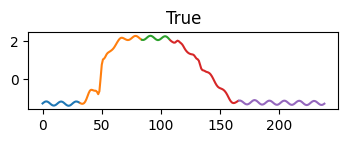

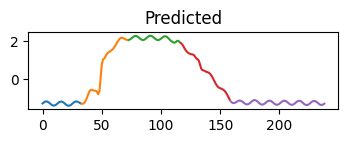

predicted= [ 33  73 117 159]
true=      [ 32  84 108 166]


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 151.86it/s]


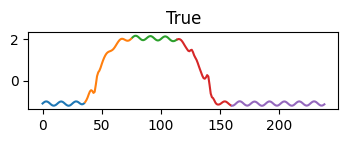

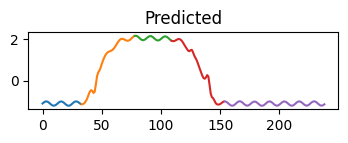

predicted= [ 33  78 109 154]
true=      [ 32  84 108 166]


100%|█████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<00:00, 151.81it/s]


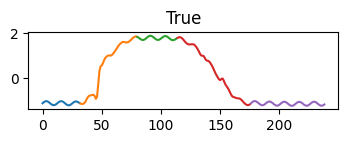

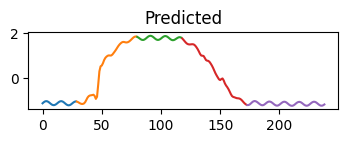

predicted= [ 29  80 118 173]
true=      [ 32  84 108 166]


100%|█████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<00:00, 154.71it/s]


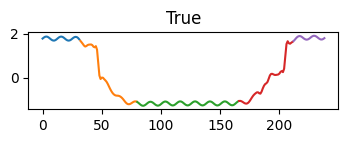

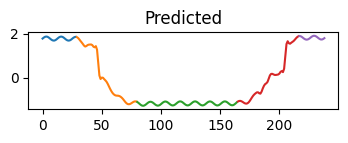

predicted= [ 29  80 165 217]
true=      [ 32  84 108 166]


100%|█████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 130.04it/s]


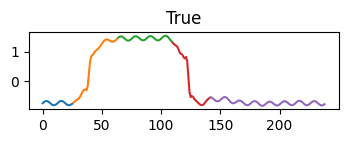

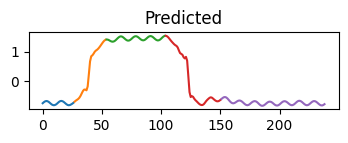

predicted= [ 27  54 104 151]
true=      [ 32  84 108 166]


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 147.61it/s]


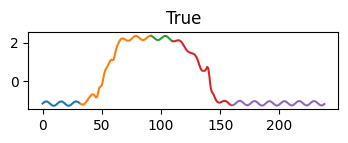

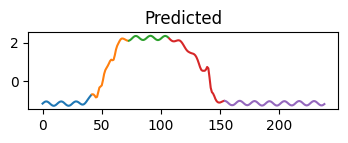

predicted= [ 42  73 107 154]
true=      [ 32  84 108 166]


In [46]:
interp_step = .5
coef_ = int(1/interp_step)

for i in [0,1,2,3,4,5,6,7,8,9]:
    vec = gestures[i,::,16,0]
#     X, X_dist = create_dist_matrix(vec, window=4)
#     X_dist = np.diff(X) @ np.diff(X).T #X @ X.T
#     vec = np.diag(X_dist)
    
    # using SVD to select channel
    pca = PCA(n_components=1)
    vec = pca.fit_transform(gestures[i,::,::,1])[::,0]
    
    xnew, new_vec = interpolate_vec(vec, new_step_size=interp_step)
    new_vec += np.sin(np.arange(new_vec.shape[0])/2)*np.max(np.abs(new_vec))/20
    cls = CLaSP(window=10, solver='knn')
    cls.fit(np.diff(new_vec), n_segments=5)
#     cls.fit(new_vec, n_segments=5)
    
    
    numbers = set()
    for elem in cls.stack:
        numbers.add(elem['start'])
        numbers.add(elem['stop'])
    predicted_chp = np.array(sorted(list(numbers)))
    
    plt.figure(figsize=(4,1))
    plt.title('True')
    new_chps = [0]+list(change_points[i]*coef_) + [new_vec.shape[0]-1]
    for i in range(len(new_chps)-1):
        plt.plot(np.arange(new_chps[i], new_chps[i+1]),  new_vec[new_chps[i]:new_chps[i+1]])
    plt.show()
    
    plt.figure(figsize=(4,1))
    plt.title('Predicted')
    for i in range(len(predicted_chp)-1):
        plt.plot(np.arange(predicted_chp[i], predicted_chp[i+1]),  new_vec[predicted_chp[i]:predicted_chp[i+1]])
    plt.show()
    
    print('predicted=', predicted_chp[1:-1])
    print('true=     ',change_points[i]*coef_)
    print('='*20)

In [ ]:
n = 8
print(cls.final_split_stack[n]['start'])
print(cls.final_split_stack[n]['stop'])
print(cls.final_split_stack[n]['clasp_max_idx'])

In [ ]:
ni = 2
print(cls.stack[ni]['start'])
print(cls.stack[ni]['stop'])
print(cls.stack[ni]['clasp_max_idx'])
print(cls.stack[ni]['clasp_max_val'])

print(cls.stack[ni]['clasp_max_idx'] + cls.stack[ni]['start'])

In [ ]:
plt.figure(figsize=(6,3))
# plt.plot(cls.final_split_stack[n]['clasp_scores'][20:-20])
plt.plot(cls.stack[ni]['clasp_scores'][20:-20])
# plt.plot(cls.final_split_stack[4]['clasp_scores'][50:-50])
plt.show()

In [ ]:
plt.figure(figsize=(6,2))
plt.title('True')
new_chps = [0]+list(change_points[i]*coef_) + [new_vec.shape[0]-1]
for i in range(len(new_chps)-1):
    plt.plot(np.arange(new_chps[i], new_chps[i+1])[1:],  np.diff(new_vec[new_chps[i]:new_chps[i+1]]))
plt.show()

plt.figure(figsize=(6,2))
plt.title('Predicted')
for i in range(len(predicted_chp)-1):
    plt.plot(np.arange(predicted_chp[i], predicted_chp[i+1])[1:],  np.diff(new_vec[predicted_chp[i]:predicted_chp[i+1]]))
plt.show()

print('predicted=', predicted_chp[1:-1])
print('true=     ',change_points[i]*coef_)
print('='*20)

In [ ]:
np.argmax(cls.final_split_stack[0]['clasp_scores'][51:-51])

In [ ]:
print(cls.final_split_stack[3]['start'])
print(cls.final_split_stack[3]['stop'])
print(cls.final_split_stack[3]['clasp_max_idx'])

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(cls.final_split_stack[3]['clasp_scores'][50:-50])
# plt.plot(cls.final_split_stack[4]['clasp_scores'][50:-50])
plt.show()

In [ ]:
predicted_chp